In [88]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
infile = 'jma_nitrate.csv'
data = pd.read_csv(infile, sep = (','))

#Let's take a look at the data.
data

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,date,year,month,day,profile,cruise,vessel,density
0,0,25.8807,34.0215,0,0.09,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.228287
1,1,25.8993,34.0217,13,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.222695
2,2,25.8843,34.0196,27,0.00,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.225773
3,3,25.9894,34.2936,51,0.48,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,22.395633
4,4,23.6146,34.5002,75,2.71,140.242833,34.926167,2010/10/03,2010.0,10.0,3.0,1.0,10-07,R/V Keifu Maru,23.263277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16216,16216,2.3991,34.4053,1204,42.96,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.334433
16217,16217,2.2752,34.4674,1403,42.88,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.394058
16218,16218,2.0916,34.5120,1602,42.20,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.444383
16219,16219,1.9582,34.5527,1801,41.73,145.709167,42.662500,2016/05/11,2016.0,5.0,11.0,529.0,16-04,R/V Ryofu Maru,27.487322


Text(0, 0.5, 'Depth (m)')

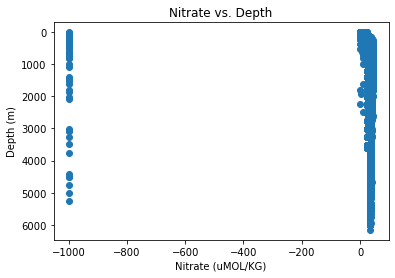

In [6]:
# Let's plot the nitrate data just to visualize what we have.
plt.scatter(data.nitrate,data.depth)
plt.gca().invert_yaxis()
plt.title('Nitrate vs. Depth')
plt.xlabel('Nitrate (uMOL/KG)')
plt.ylabel('Depth (m)')

# The raw jma data appear to have some nitrate values at -999, representing either no data or bad data. These have to be removed before we can continue.

Text(0, 0.5, 'Depth (m)')

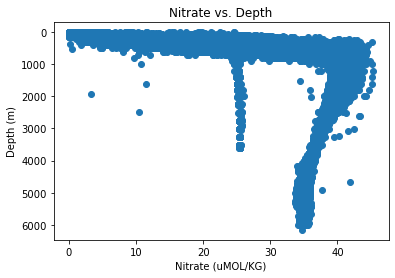

In [7]:
# Looks like there are -999 values to indicate no samples or bad samples. Let's take those out.
corr_data = data[data.nitrate>0]
plt.scatter(corr_data.nitrate,corr_data.depth)
plt.gca().invert_yaxis()
plt.title('Nitrate vs. Depth')
plt.xlabel('Nitrate (uMOL/KG)')
plt.ylabel('Depth (m)')

# This looks a lot better. We not have a nice depth profile of nitrate values, excluding the erroneous -999 values.

Text(0, 0.5, 'Latitude')

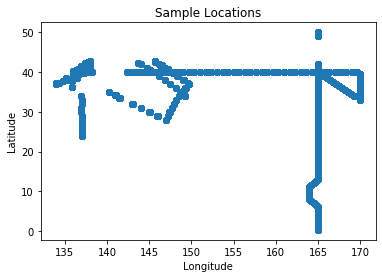

In [8]:
# Let's see where the good samples came from.
plt.scatter(corr_data.lon,corr_data.lat)
plt.title('Sample Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# The scatter plot above indicates these samples were likely taken from multiple cruises. 

In [2]:
# Set the limits for the data we use to train the model. Set by coorinate range and year.
#train_data = corr_data[(corr_data.lon>165)&(corr_data.lon<165.9)&(corr_data.lat>0)&(corr_data.lat<41)&(corr_data.year == 2011.0)]  


In [1]:
# Take a look at the cruise data
#train_data

In [9]:
# Now let's set the variables we want to use to train the model to estimate nitrate values.
X = corr_data[["sal","theta"]]
y = corr_data[["nitrate"]]

print(np.shape(X))
print(np.shape(y))

(15574, 2)
(15574, 1)


In [10]:
# Now we split the data into training and testing data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

results = []
for n in range(1,18,1):
    res = []
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    print ('Neighbors = %s\n' % (int(n)))
    # compute the R^2 score
    accuracyscore = model.score(X_train,y_train)
    print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
    xfit = X_test
    yfit = model.predict(xfit)
    print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
    rmse = sqrt(mean_squared_error(y_test, yfit))
    print("RMSE = %s \n" % (rmse))
    res = [n,accuracyscore,rmse]
    results.append(res)

Neighbors = 1

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 2.60583634978522 

Neighbors = 2

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.430275808548893 

Neighbors = 3

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.3205526446134184 

Neighbors = 4

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.29476945681954 

Neighbors = 5

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.2658388929764093 

Neighbors = 6

Training R^2 score: 0.99

Testing R^2 score: 1.00

RMSE = 2.2178488083952663 

Neighbors = 7

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.2136395187022755 

Neighbors = 8

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.195321052711501 

Neighbors = 9

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.202207981381956 

Neighbors = 10

Training R^2 score: 0.98

Testing R^2 score: 1.00

RMSE = 2.193945235631519 

Neighbors = 11

Training R^2 score: 0.98

Testing R^2 score: 1.00



    Kneighbors  AccScore      RMSE
0          1.0  0.999911  2.605836
1          2.0  0.992724  2.430276
2          3.0  0.989437  2.320553
3          4.0  0.987749  2.294769
4          5.0  0.986243  2.265839
5          6.0  0.985364  2.217849
6          7.0  0.984661  2.213640
7          8.0  0.984078  2.195321
8          9.0  0.983682  2.202208
9         10.0  0.983316  2.193945
10        11.0  0.983014  2.202338
11        12.0  0.982542  2.214419
12        13.0  0.982037  2.204178
13        14.0  0.981675  2.208861
14        15.0  0.981296  2.215231
15        16.0  0.981034  2.223326
16        17.0  0.980705  2.228233


Text(0, 0.5, 'RMSE')

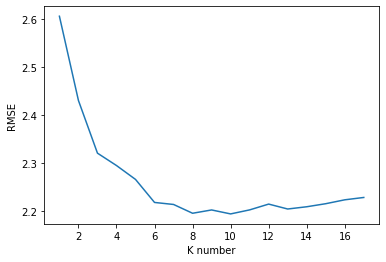

In [12]:
score_array = np.asarray(results)

#make a dataframe with each column named for ploting
KNN_test_data = pd.DataFrame({'Kneighbors': score_array[:,0], 'AccScore': score_array[:,1], 'RMSE': score_array[:,2]})
print(KNN_test_data)

plt.plot(score_array[:,0],score_array[:,2])
plt.xlabel('K number')
plt.ylabel('RMSE')

In [17]:
# K values of 8 and 10 appear to show the lowest RMSE, with 10 being slightly lower.
# We will use a K of 10, but thise code allows us to input a value to test if necessary.

n  = int(input('Choose a number for k: '))

#Call to the model.
model = KNeighborsRegressor(n_neighbors=n)
model.fit(X_train, y_train)

# compute the R^2 score
print("Training R^2 score: {0:.2f}".format(model.score(X_train,y_train)))

# plot the model together with the data
xfit = X_test
yfit = model.predict(xfit)
print("Testing R^2 score: {0:.2f}".format(model.score(xfit,yfit)))

#plt.scatter(X_train[["theta"]],y_train)
#plt.scatter(xfit[["theta"]], yfit,c = 'k')

Choose a number for k: 10
Training R^2 score: 0.98
Testing R^2 score: 1.00


In [15]:
# plot the nitrate predictions vs the other test variable (i.e. salinity)
# and plot the train data to compare with the model

#plt.scatter(X_train[["sal"]],y_train)
#plt.scatter(xfit[["sal"]], yfit,c = 'k')

# Somewhere around here I need to load in the BCG data and compare the environmental data, etc.

In [93]:
# Reading in the Argo float data with no NO3 values
infile = 'kuro_BGCargo_noNO3.csv'
data_BGC = pd.read_csv(infile, sep = (','))

data_BGC

In [96]:
# Separating the date column of BGC argo data into year month and day columns to look at seasonality compared to the jma data.
import datetime

data_BGC['year'] = pd.DatetimeIndex(data_BGC['Date/GMT']).year
data_BGC['month'] = pd.DatetimeIndex(data_BGC['Date/GMT']).month
data_BGC['day'] = pd.DatetimeIndex(data_BGC['Date/GMT']).day
data_BGC.head()

,Date/GMT,Days since 1/1/1900,DEPTH[M],PRESSURE[DBAR],NA,SALINITY[PSS],TEMPERATURE[C],SIGMATHETA[KG/M3],OXYGEN[uMOL/KG],OXYGENSAT,LON,LAT,year,month,day
0,03/02/2013 13:38,41335.568,-989.324,-999.09,3,34.3676,3.2285,27.366,35.1,10.9,148.688,36.983,2013,3,2
1,03/02/2013 13:38,41335.568,-941.762,-950.95,3,34.3560,3.3824,27.342,39.2,12.2,148.688,36.983,2013,3,2
2,03/02/2013 13:38,41335.568,-892.728,-901.33,3,34.3380,3.4966,27.316,40.2,12.6,148.688,36.983,2013,3,2
3,03/02/2013 13:38,41335.568,-842.920,-850.94,3,34.2972,3.4847,27.284,35.5,11.1,148.688,36.983,2013,3,2
4,03/02/2013 13:38,41335.568,-794.287,-801.75,3,34.2942,3.6554,27.265,38.6,12.1,148.688,36.983,2013,3,2


# Now that we have the unknown argo data in, we need to compare some of the geographic and environmental parameters to see if it is worth using jma data as our model data.

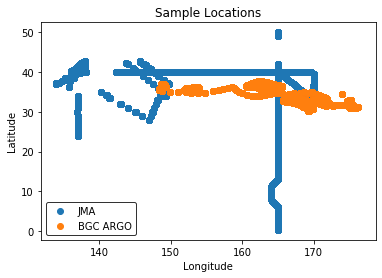

In [100]:
plt.scatter(corr_data.lon,corr_data.lat)
plt.scatter(data_BGC.LON,data_BGC.LAT)
plt.title('Sample Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(('JMA','BGC ARGO'), edgecolor='k', loc='lower left')

# From this combined sample location plot, we can see that both locations overlap to some degree. It appears that both the argo data and jma data have a good line of data points from about 150 to 175 east and 30 to 41 north

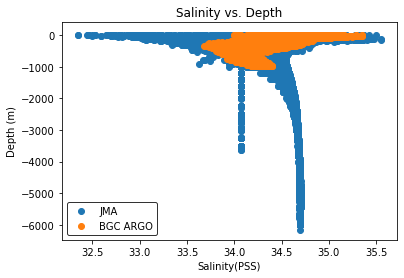

In [107]:
#Plot to look at salinity and depth comparison
plt.scatter(corr_data.sal,-corr_data.depth)
plt.scatter(data_BGC['SALINITY[PSS]'],data_BGC['DEPTH[M]'])
plt.title('Salinity vs. Depth')
plt.xlabel('Salinity(PSS)')
plt.ylabel('Depth (m)')
plt.legend(('JMA','BGC ARGO'), edgecolor='k', loc='lower left')

#

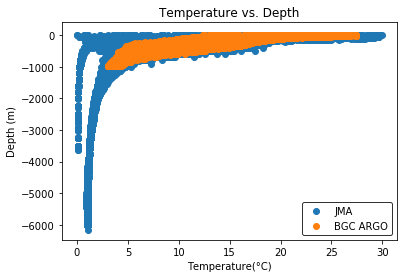

In [113]:
#Plot to look at temperature and depth comparison
plt.scatter(corr_data.theta,-corr_data.depth)
plt.scatter(data_BGC['TEMPERATURE[C]'],data_BGC['DEPTH[M]'])
plt.title('Temperature vs. Depth')
plt.xlabel('Temperature(\N{DEGREE SIGN}C)')
plt.ylabel('Depth (m)')
plt.legend(('JMA','BGC ARGO'), edgecolor='k', loc='lower right')

# 

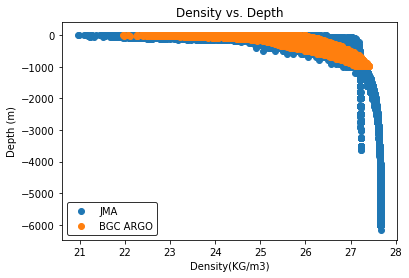

In [117]:
#Plot to look at density and depth comparison
plt.scatter(corr_data.density,-corr_data.depth)
plt.scatter(data_BGC['SIGMATHETA[KG/M3]'],data_BGC['DEPTH[M]'])
plt.title('Density vs. Depth')
plt.xlabel('Density(KG/m3)')
plt.ylabel('Depth (m)')
plt.legend(('JMA','BGC ARGO'), edgecolor='k', loc='lower left')

#

Text(0, 0.5, 'Sample count')

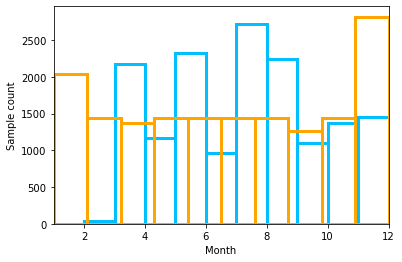

In [134]:
month = [0,12,1]
plt.hist(corr_data.month, facecolor = "none", edgecolor = "deepskyblue", lw = 3)
plt.hist(data_BGC['month'], facecolor = "none", edgecolor = "orange", lw = 3)
plt.xlim([1,12])
plt.xlabel("Month")
plt.ylabel("Sample count")

# 